In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
IMG_SIZE = 150

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30
)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN-XGBoost/dataset/Training', target_size=(IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary')

Found 4155 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN-XGBoost/dataset/Testing', target_size=(IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary')

Found 842 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',input_shape=[IMG_SIZE, IMG_SIZE, 3]))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
130/130 [==============================] - 1093s 8s/step - loss: 0.0603 - accuracy: 0.9788 - val_loss: 0.0524 - val_accuracy: 0.9905
Epoch 2/10
130/130 [==============================] - 48s 366ms/step - loss: 0.0490 - accuracy: 0.9815 - val_loss: 0.0872 - val_accuracy: 0.9786
Epoch 3/10
130/130 [==============================] - 46s 357ms/step - loss: 0.0484 - accuracy: 0.9807 - val_loss: 0.1587 - val_accuracy: 0.9489
Epoch 4/10
130/130 [==============================] - 48s 366ms/step - loss: 0.0464 - accuracy: 0.9836 - val_loss: 0.0857 - val_accuracy: 0.9679
Epoch 5/10
130/130 [==============================] - 47s 360ms/step - loss: 0.0434 - accuracy: 0.9856 - val_loss: 0.0704 - val_accuracy: 0.9715
Epoch 6/10
130/130 [==============================] - 52s 400ms/step - loss: 0.0510 - accuracy: 0.9812 - val_loss: 0.0814 - val_accuracy: 0.9667
Epoch 7/10
130/130 [==============================] - 47s 360ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 0.0399 - val_acc

In [12]:
model.save('/content/drive/MyDrive/CNN-XGBoost/40_epochs_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
model = tf.keras.models.load_model('/content/drive/MyDrive/CNN-XGBoost/30_epochs.h5')

1/1 [==============================] - 0s 17ms/step


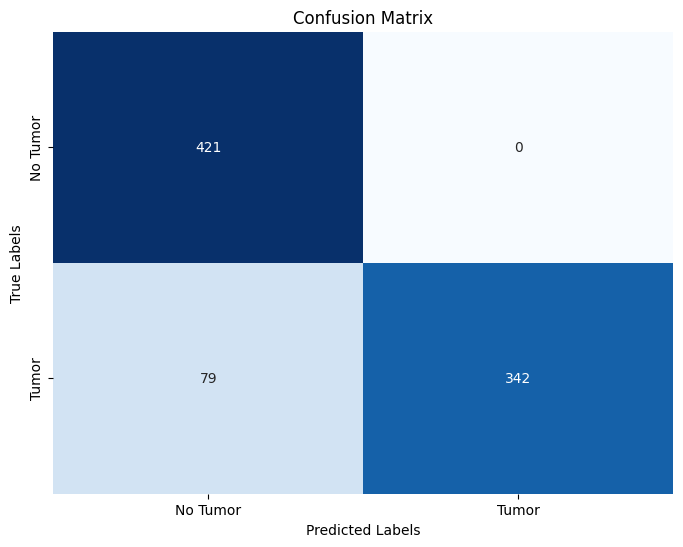

0.9061757719714965


In [13]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

test_dir = '/content/drive/MyDrive/CNN-XGBoost/dataset/Testing'

true_labels = []
predicted_labels = []

for filename in os.listdir(os.path.join(test_dir, 'no_tumor')):
    img_path = os.path.join(test_dir, 'no_tumor', filename)
    if img_path.endswith(".jpg") or img_path.endswith(".png"):
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        result = model.predict(img_array)
        predicted_class = 1 if result[0][0] > 0.5 else 0

        true_labels.append(0)
        predicted_labels.append(predicted_class)

for filename in os.listdir(os.path.join(test_dir, 'tumor')):
    img_path = os.path.join(test_dir, 'tumor', filename)
    if img_path.endswith(".jpg") or img_path.endswith(".png"):
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        result = model.predict(img_array)
        predicted_class = 1 if result[0][0] > 0.5 else 0

        true_labels.append(1)
        predicted_labels.append(predicted_class)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['No Tumor', 'Tumor'])
plt.yticks([0.5, 1.5], ['No Tumor', 'Tumor'])
plt.show()
print(accuracy_score(true_labels, predicted_labels))